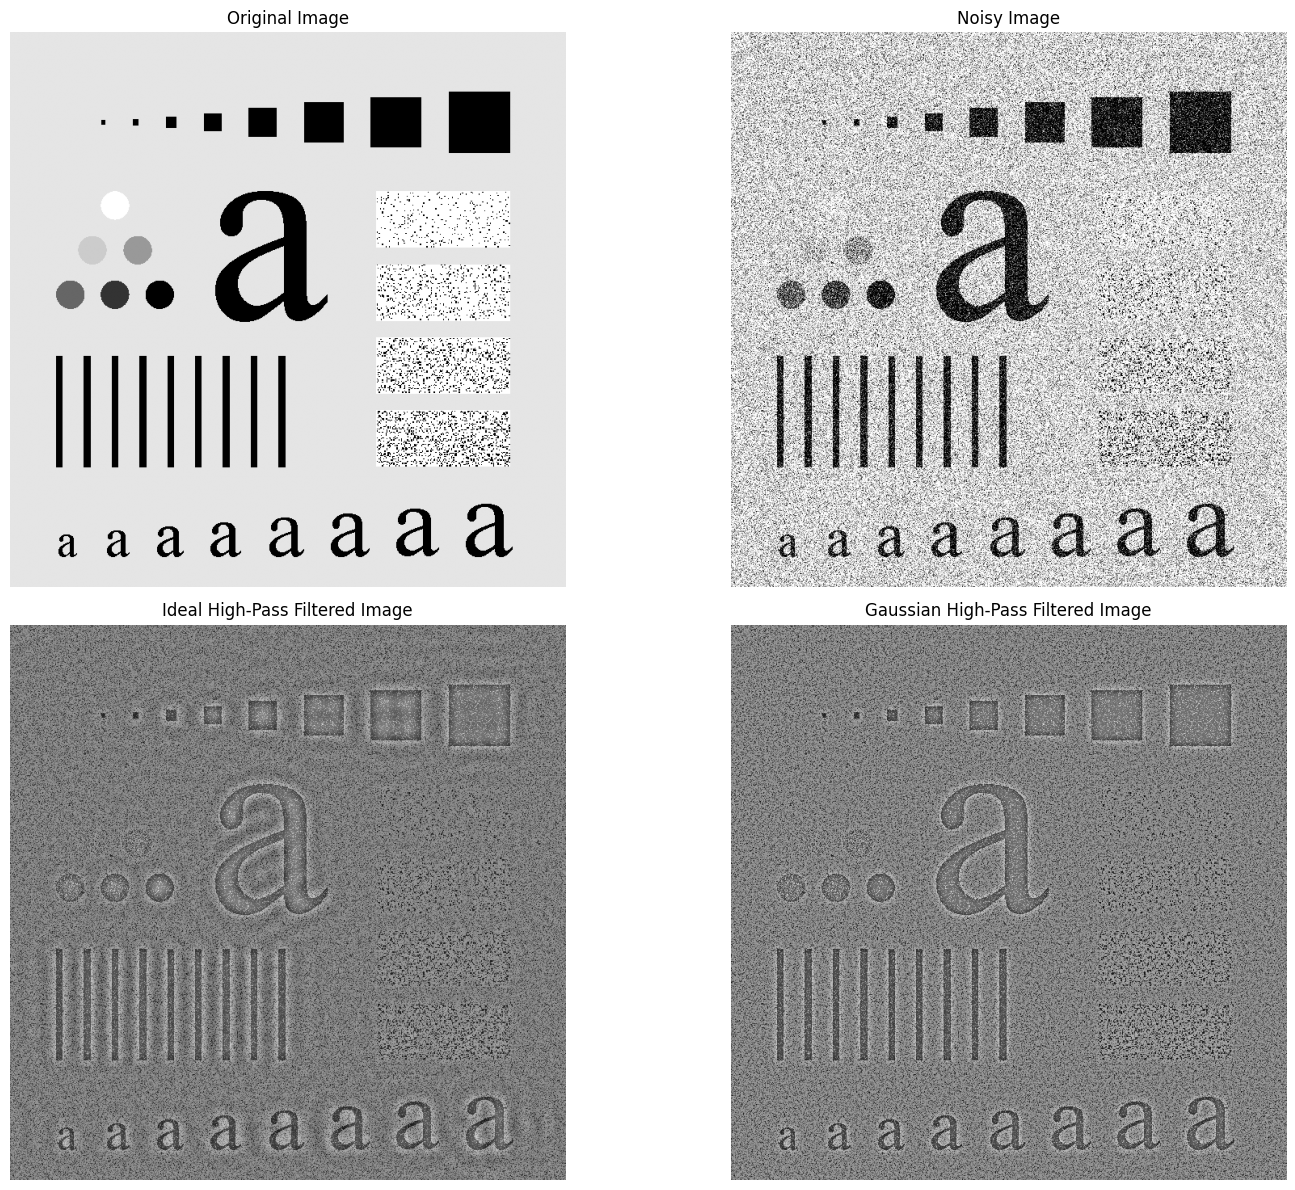

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=90):
    noise = np.random.normal(mean, sigma, image.shape)  # Generate Gaussian noise
    noisy_image = np.clip(image + noise, 0, 255)  # Clip pixel values to valid range
    return noisy_image.astype(np.uint8)

# Function to perform 2D Discrete Fourier Transform (DFT) and shift the zero frequency to the center
def compute_dft(image):
    return np.fft.fftshift(np.fft.fft2(image))

# Function to perform inverse DFT and return the real part of the transformed image
def compute_idft(image):
    return np.fft.ifft2(np.fft.ifftshift(image)).real

# Function to generate an Ideal High-Pass Filter
def create_ideal_hpf(shape, cutoff):
    H, W = shape  # Image dimensions
    y, x = np.ogrid[:H, :W]  # Create coordinate grid
    center = (H // 2, W // 2)  # Center of the image
    distance = np.sqrt((y - center[0]) ** 2 + (x - center[1]) ** 2)  # Compute distance from center
    return (distance > cutoff).astype(np.float32)  # Pass frequencies greater than cutoff

# Function to generate a Gaussian High-Pass Filter
def create_gaussian_hpf(shape, cutoff):
    H, W = shape
    y, x = np.ogrid[:H, :W]  # Create coordinate grid
    center = (H // 2, W // 2)  # Center of the image
    distance = np.sqrt((y - center[0]) ** 2 + (x - center[1]) ** 2)  # Compute distance from center
    return 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))  # Gaussian high-pass formula

# Function to apply a high-pass filter in the frequency domain
def apply_high_pass_filter(image, filter_mask):
    return image * filter_mask  # Element-wise multiplication in the frequency domain

# Load grayscale image
image_path = "img3.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noisy_image = add_gaussian_noise(original_image)

# Compute DFT of noisy image
dft_image = compute_dft(noisy_image)

# Define cutoff frequency for high-pass filtering
cutoff_frequency = 25

# Create high-pass filters
ideal_hpf = create_ideal_hpf(original_image.shape, cutoff_frequency)
gaussian_hpf = create_gaussian_hpf(original_image.shape, cutoff_frequency)

# Apply Ideal High-Pass Filter
ideal_filtered_dft = apply_high_pass_filter(dft_image, ideal_hpf)
ideal_filtered_image = compute_idft(ideal_filtered_dft)

# Apply Gaussian High-Pass Filter
gaussian_filtered_dft = apply_high_pass_filter(dft_image, gaussian_hpf)
gaussian_filtered_image = compute_idft(gaussian_filtered_dft)

# Plot results
plt.figure(figsize=(16, 12))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

# Ideal High-Pass Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(ideal_filtered_image, cmap='gray')
plt.title("Ideal High-Pass Filtered Image")
plt.axis('off')

# Gaussian High-Pass Filtered Image
plt.subplot(2, 2, 4)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Gaussian High-Pass Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()
